In [48]:
##How to perform active machine learning

# Normal libraries

from pandas import read_csv
import pandas as pd
import numpy as np
import datetime

# Library to build a model using keras that is build on tensorflow
# (a library on how to handle tensor and their function)
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

# Library to build generic models

from scipy.optimize import curve_fit


# Libraries about the learning process of the actual AI
from keras.callbacks import ModelCheckpoint

# from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Useful libraries
from matplotlib import pyplot as plt
import math

In [49]:
Sensors = pd.read_csv("../../../Downloads/appa2_timeline.csv", sep=",")
Sensors.set_index("channel", inplace=True)
Sensors = Sensors.applymap(lambda x: x.replace("*", ""))

df = read_csv("../../DataSet_FBK/ViaBolz.csv", sep=",", parse_dates=["ts"])
df.set_index("ts", inplace=True)

change = {}
for i in range(1, 9):
    change[f"S{str(i)}_R1"] = f"T{str(i)}"
    change[f"S{str(i)}_R2"] = f"R{str(i)}"
    change[f"S{str(i)}_Voltage"] = f"V{str(i)}"
df = df.rename(columns=change)


Test = {}
maxim = len(Sensors.columns)
for i, col in enumerate(Sensors.columns):
    materials = []
    if i == maxim - 1:
        for j, material in enumerate(Sensors[col]):
            f = materials.count(material) + 1
            materials.append(material)
            if list(Test.keys()).count(material + str(f)) == 1:
                Test[material + str(f)] = pd.concat(
                    [
                        Test[material + str(f)],
                        df[col:][
                            ["R" + str(j + 1), "T" + str(j + 1), "V" + str(j + 1)]
                        ].rename(
                            columns={
                                "R" + str(j + 1): "R",
                                "T" + str(j + 1): "HT",
                                "V" + str(j + 1): "V",
                            }
                        ),
                    ]
                )
            else:
                Test[material + str(f)] = df[col:][
                    ["R" + str(j + 1), "T" + str(j + 1), "V" + str(j + 1)]
                ].rename(
                    columns={
                        "R" + str(j + 1): "R",
                        "T" + str(j + 1): "HT",
                        "V" + str(j + 1): "V",
                    }
                )
    else:
        for j, material in enumerate(Sensors[col]):
            f = materials.count(material) + 1
            materials.append(material)
            if list(Test.keys()).count(material + str(f)) == 1:
                Test[material + str(f)] = pd.concat(
                    [
                        Test[material + str(f)],
                        df[col : Sensors.columns[i + 1]][
                            ["R" + str(j + 1), "T" + str(j + 1), "V" + str(j + 1)]
                        ].rename(
                            columns={
                                "R" + str(j + 1): "R",
                                "T" + str(j + 1): "HT",
                                "V" + str(j + 1): "V",
                            }
                        ),
                    ]
                )
            else:
                Test[material + str(f)] = df[col : Sensors.columns[i + 1]][
                    ["R" + str(j + 1), "T" + str(j + 1), "V" + str(j + 1)]
                ].rename(
                    columns={
                        "R" + str(j + 1): "R",
                        "T" + str(j + 1): "HT",
                        "V" + str(j + 1): "V",
                    }
                )

df8 = Test["LaFeO31"]

df_appa = read_csv("../../DataSet_APPA/APPA2.csv")
df_appa
df_appa.Time = pd.to_datetime(df_appa.Time)
timezone_offset = datetime.timedelta(hours=2)
timezone = datetime.timezone(timezone_offset)

df_appa.Time = df_appa.Time.apply(lambda x: x.replace(tzinfo=timezone))
df_appa.rename(columns={"Time": "ts"}, inplace=True)

In [50]:
df8 = df8.resample("1H").mean()
df_tot = df8.reset_index().merge(df_appa)
df_tot.set_index("ts", inplace=True)
df_tot = df_tot.sort_index().dropna()
df_tot = df_tot.dropna()

In [51]:
df_tot

,R,HT,V,PM10,Ossido di Carbonio,Biossido di Azoto
ts,,,,,,
2021-01-13 10:00:00+00:00,3.293993e+07,77.171739,2.153696,53.0,0.8,67.0
2021-01-13 11:00:00+00:00,2.648063e+05,90.883051,3.234746,48.0,0.7,68.0
2021-01-13 12:00:00+00:00,2.617744e+05,90.857627,3.234746,43.0,0.7,71.0
2021-01-13 13:00:00+00:00,2.601968e+05,90.866102,3.233898,46.0,0.7,76.0
2021-01-13 14:00:00+00:00,2.600834e+05,90.801695,3.234068,66.0,1.0,107.0
...,...,...,...,...,...,...
2023-06-26 05:00:00+00:00,2.850602e+06,112.324138,3.363276,25.0,0.3,25.0
2023-06-26 06:00:00+00:00,3.045518e+06,112.315254,3.362712,25.0,0.3,27.0
2023-06-26 07:00:00+00:00,2.443874e+06,112.268333,3.362167,20.0,0.3,14.0


In [52]:
print(df_tot.sort_index().loc["2021-01-01":"2021-02-1"]["PM10"].values)

['53.0' '48.0' '43.0' '46.0' '66.0' '95.0' '100.0' '93.0' '104.0' '102.0'
 '87.0' '68.0' '64.0' '59.0' '43.0' '42.0' '40.0' '39.0' '35.0' '32.0'
 '46.0' '51.0' '54.0' '49.0' '41.0' '27.0' '17.0' '12.0' '9.0' '7.0' '9.0'
 '11.0' '16.0' '20.0' '32.0' '32.0' '29.0' '28.0' '18.0' '21.0' '23.0'
 '23.0' '23.0' '25.0' '25.0' '20.0' '16.0' '16.0' '17.0' '17.0' '17.0'
 '17.0' '29.0' '43.0' '50.0' '79.0' '61.0' '66.0' '72.0' '67.0' '55.0'
 '35.0' '34.0' '30.0' '25.0' '24.0' '21.0' '17.0' '17.0' '27.0' '32.0'
 '26.0' '19.0' '18.0' '17.0' '30.0' '21.0' '47.0' '62.0' '75.0' '108.0'
 '103.0' '73.0' '68.0' '54.0' '35.0' '30.0' '24.0' '22.0' '20.0' '22.0'
 '22.0' '25.0' '26.0' '30.0' '34.0' '41.0' '33.0' '37.0' '31.0' '33.0'
 '53.0' '84.0' '101.0' '105.0' '92.0' '85.0' '75.0' '65.0' '54.0' '49.0'
 '44.0' '35.0' '33.0' '33.0' '40.0' '47.0' '49.0' '51.0' '67.0' '54.0'
 '46.0' '50.0' '52.0' '119.0' '120.0' '128.0' '131.0' '84.0' '63.0' '52.0'
 '34.0' '33.0' '27.0' '18.0' '20.0' '18.0' '29.0' '26.0' '37.0

In [53]:
##Example of curve fit


##Define a model
def f_model(x, a, b, c, d, e):
    Sig, T, RH = x
    return a * Sig**b + d * T + e + c


##df8 is an example of a dataframe, indexed with data and with columns name not really informative

##You are training here from a start to end the slicing of a database
(
    popt,
    pcov,
) = curve_fit(  # popt are the optimal values, pcov is the covariance matrix of the optimized values.
    f=f_model,  # model function
    xdata=(
        df_tot.sort_index().loc["2021-01-01":"2021-04-1"]["V"].values,
        df_tot.sort_index().loc["2021-01-01":"2021-04-1"]["R"].values,
        df_tot.sort_index().loc["2021-01-01":"2021-04-1"]["HT"].values,
    ),  # x data
    ydata=df_tot.sort_index().loc["2021-01-01":"2021-04-1"]["PM10"].values,  # y data
    p0=(4, 1, 1, 1, 1),  # initial value of the parameters
    maxfev=10000,  # Number of times in which you repeat the training, close to epochs
)
a_opt, b_opt, c_opt, d_opt, e_opt = popt
df_tot["model 1"] = f_model(
    (df_tot["V"].values, df_tot["R"].values, df_tot["HT"].values),
    a_opt,
    b_opt,
    c_opt,
    d_opt,
    e_opt,
)  # Here you are predicting the value of your complete samples

c:\Users\lucag\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


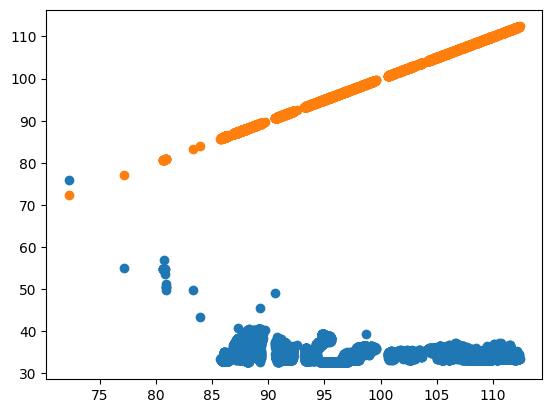

In [54]:
plt.scatter(df_tot["HT"], df_tot["model 1"])
plt.scatter(df_tot["HT"], df_tot["HT"])

In [55]:
df_tot

,R,HT,V,PM10,Ossido di Carbonio,Biossido di Azoto,model 1
ts,,,,,,,
2021-01-13 10:00:00+00:00,3.293993e+07,77.171739,2.153696,53.0,0.8,67.0,55.006531
2021-01-13 11:00:00+00:00,2.648063e+05,90.883051,3.234746,48.0,0.7,68.0,32.697212
2021-01-13 12:00:00+00:00,2.617744e+05,90.857627,3.234746,43.0,0.7,71.0,32.695142
2021-01-13 13:00:00+00:00,2.601968e+05,90.866102,3.233898,46.0,0.7,76.0,32.694065
2021-01-13 14:00:00+00:00,2.600834e+05,90.801695,3.234068,66.0,1.0,107.0,32.693987
...,...,...,...,...,...,...,...
2023-06-26 05:00:00+00:00,2.850602e+06,112.324138,3.363276,25.0,0.3,25.0,34.462694
2023-06-26 06:00:00+00:00,3.045518e+06,112.315254,3.362712,25.0,0.3,27.0,34.595775
2023-06-26 07:00:00+00:00,2.443874e+06,112.268333,3.362167,20.0,0.3,14.0,34.184995


In [68]:
##Example of Scaler, matrices or something like these

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

##Place whatever dataframe you want
X = df_tot.drop(["PM10","Ossido di Carbonio","Biossido di Azoto"], axis=1)

y = df_tot["Biossido di Azoto"].copy()

try :
    INPUT_DIM = len(X.columns)
    OUTPUT_DIM = len(y.columns)
except:
    INPUT_DIM = len(X.columns)
    OUTPUT_DIM = 1

In [69]:
# Split training and test, remember that you may want to not shuffle data while dividing them
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, shuffle=True
)
# You perform a standard scaler (or minmax scaler) to make the data more usable by the machine learning
# model
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

scaler = StandardScaler()
scaler.fit(y_train.values.reshape(-1,1))

y_train_s = scaler.transform(y_train.values.reshape(-1,1))
y_test_s = scaler.transform(y_test.values.reshape(-1,1))

In [58]:
a2 = "mean_squared_error"
# define the model
# Experiment with deeper and wider networks
model = Sequential()
# By Sequential it means that the layers are connected one after the one before so that you have
# a defined flow of information


# Input layer, Dense layer meaning that the layer is connected to all the neurons to the layer before
# kernel_initializer is the how the starting values of the parameters of your neural network (NN)
# input_dim is the number of features of the dataset that you are feeding to your NN
# activation function is how you introduce non linearity in your model.

model.add(
    Dense(64, kernel_initializer="normal", input_dim=INPUT_DIM, activation="selu")
)

# Hidden layers:
# Dropout layer is just a layer where you drops, for example the 20% of the links between the two layers
# that it is placed between
model.add(Dropout(0.2))

model.add(Dense(128, kernel_initializer="normal", activation="selu"))
model.add(Dropout(0.2))
model.add(Dense(64, kernel_initializer="normal", activation="selu"))
model.add(Dropout(0.2))

model.add(Dense(16, kernel_initializer="normal", activation="selu"))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(OUTPUT_DIM, kernel_initializer="normal", activation="linear"))

# with add you can add a new layer, with pop you remove the last layer you have placed there


# You are compiling your model, so from now on you can't change its structure. Here you specify its loss function,
# the function that you want to minimize, the optimizer that is how you want to optimize the parameters,
# the metrics that is another value that you can use to measure your model but you won't use it to optimize
# the model
model.compile(loss=a2, optimizer="adam", metrics=[a2])
# You are showing how your NN is formed
model.summary()

##Here you are defining something that is not necessary. You are defining condition by which you are saving
# definite models. For example in that case you are specifing where do you want to place them, you are searching
# the model where the value of the loss function over the validation set (data not seen by the model during
# the training) is minimum. The weight of the "best model" by that value is saved there.
checkpoint_name = "./tmp/checkpoint"
checkpoint = ModelCheckpoint(
    checkpoint_name, monitor="val_loss", verbose=1, save_best_only=True, mode="min"
)
callbacks_list = [checkpoint]
# In the history you collect the important information that happens during the fit, value of loss function,
# metrics and so on in one variable.
# During the fit  the parameters of the NN are updated. You are specifing the training data, X and y, and either
# you give the fit function the validation data or you give them a percentage as the validation_split, in this case 20%
# after that you are specifing the number of epochs, meaning how many time the model has seen the same data,
# and then the callbacks that you want to use. Notice that you can have more than one callback.
# There are more parameters that you can implement, so take a look at them
history = model.fit(
    X_train_scaled, y_train_s, validation_split=0.2, epochs=300, callbacks=[checkpoint]
)
# After performing the training you are uploading the best model that you have saved in the callback, updating
# the value of your parameters
model.load_weights(checkpoint_name)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                320       
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 128)               8320      
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 16)               

336/349 [===========================>..] - ETA: 0s - loss: 0.8893 - mean_squared_error: 0.8893
Epoch 1: val_loss improved from inf to 0.91255, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 2s 3ms/step - loss: 0.8910 - mean_squared_error: 0.8910 - val_loss: 0.9126 - val_mean_squared_error: 0.9126
Epoch 2/300
328/349 [===========================>..] - ETA: 0s - loss: 0.8727 - mean_squared_error: 0.8727
Epoch 2: val_loss improved from 0.91255 to 0.89292, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 1s 3ms/step - loss: 0.8722 - mean_squared_error: 0.8722 - val_loss: 0.8929 - val_mean_squared_error: 0.8929
Epoch 3/300
310/349 [=========================>....] - ETA: 0s - loss: 0.8701 - mean_squared_error: 0.8701
Epoch 3: val_loss improved from 0.89292 to 0.88812, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 1s 3ms/step - loss: 0.8628 - mean_squared_error: 0.8628 - val_loss: 0.8881 - val_mean_squared_error: 0.8881
Epoch 4/300
325/349 [==========================>...] - ETA: 0s - loss: 0.8522 - mean_squared_error: 0.8522
Epoch 4: val_loss improved from 0.88812 to 0.86714, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 1s 3ms/step - loss: 0.8578 - mean_squared_error: 0.8578 - val_loss: 0.8671 - val_mean_squared_error: 0.8671
Epoch 5/300
329/349 [===========================>..] - ETA: 0s - loss: 0.8535 - mean_squared_error: 0.8535
Epoch 5: val_loss improved from 0.86714 to 0.85491, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 1s 3ms/step - loss: 0.8545 - mean_squared_error: 0.8545 - val_loss: 0.8549 - val_mean_squared_error: 0.8549
Epoch 6/300
342/349 [============================>.] - ETA: 0s - loss: 0.8457 - mean_squared_error: 0.8457
Epoch 6: val_loss improved from 0.85491 to 0.83922, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 1s 4ms/step - loss: 0.8447 - mean_squared_error: 0.8447 - val_loss: 0.8392 - val_mean_squared_error: 0.8392
Epoch 7/300
306/349 [=========================>....] - ETA: 0s - loss: 0.8322 - mean_squared_error: 0.8322
Epoch 7: val_loss improved from 0.83922 to 0.81881, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 1s 3ms/step - loss: 0.8325 - mean_squared_error: 0.8325 - val_loss: 0.8188 - val_mean_squared_error: 0.8188
Epoch 8/300
333/349 [===========================>..] - ETA: 0s - loss: 0.8155 - mean_squared_error: 0.8155
Epoch 8: val_loss improved from 0.81881 to 0.79846, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 1s 3ms/step - loss: 0.8138 - mean_squared_error: 0.8138 - val_loss: 0.7985 - val_mean_squared_error: 0.7985
Epoch 9/300
319/349 [==========================>...] - ETA: 0s - loss: 0.7879 - mean_squared_error: 0.7879
Epoch 9: val_loss improved from 0.79846 to 0.76101, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 1s 3ms/step - loss: 0.7910 - mean_squared_error: 0.7910 - val_loss: 0.7610 - val_mean_squared_error: 0.7610
Epoch 10/300
332/349 [===========================>..] - ETA: 0s - loss: 0.7777 - mean_squared_error: 0.7777
Epoch 10: val_loss improved from 0.76101 to 0.74335, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 1s 3ms/step - loss: 0.7757 - mean_squared_error: 0.7757 - val_loss: 0.7434 - val_mean_squared_error: 0.7434
Epoch 11/300
329/349 [===========================>..] - ETA: 0s - loss: 0.7626 - mean_squared_error: 0.7626
Epoch 11: val_loss improved from 0.74335 to 0.72360, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 1s 4ms/step - loss: 0.7636 - mean_squared_error: 0.7636 - val_loss: 0.7236 - val_mean_squared_error: 0.7236
Epoch 12/300
345/349 [============================>.] - ETA: 0s - loss: 0.7628 - mean_squared_error: 0.7628
Epoch 12: val_loss did not improve from 0.72360
349/349 [==============================] - 1s 2ms/step - loss: 0.7619 - mean_squared_error: 0.7619 - val_loss: 0.7270 - val_mean_squared_error: 0.7270
Epoch 13/300
324/349 [==========================>...] - ETA: 0s - loss: 0.7398 - mean_squared_error: 0.7398
Epoch 13: val_loss did not improve from 0.72360
349/349 [==============================] - 1s 2ms/step - loss: 0.7385 - mean_squared_error: 0.7385 - val_loss: 0.7239 - val_mean_squared_error: 0.7239
Epoch 14/300
334/349 [===========================>..] - ETA: 0s - loss: 0.7347 - mean_squared_error: 0.7347
Epoch 14: val_loss improved from 0.72360 to 0.71273, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 1s 3ms/step - loss: 0.7389 - mean_squared_error: 0.7389 - val_loss: 0.7127 - val_mean_squared_error: 0.7127
Epoch 15/300
316/349 [==========================>...] - ETA: 0s - loss: 0.7350 - mean_squared_error: 0.7350
Epoch 15: val_loss improved from 0.71273 to 0.70901, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 1s 4ms/step - loss: 0.7314 - mean_squared_error: 0.7314 - val_loss: 0.7090 - val_mean_squared_error: 0.7090
Epoch 16/300
325/349 [==========================>...] - ETA: 0s - loss: 0.7178 - mean_squared_error: 0.7178
Epoch 16: val_loss did not improve from 0.70901
349/349 [==============================] - 1s 2ms/step - loss: 0.7228 - mean_squared_error: 0.7228 - val_loss: 0.7218 - val_mean_squared_error: 0.7218
Epoch 17/300
338/349 [============================>.] - ETA: 0s - loss: 0.7169 - mean_squared_error: 0.7169
Epoch 17: val_loss improved from 0.70901 to 0.67931, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 1s 4ms/step - loss: 0.7137 - mean_squared_error: 0.7137 - val_loss: 0.6793 - val_mean_squared_error: 0.6793
Epoch 18/300
343/349 [============================>.] - ETA: 0s - loss: 0.7057 - mean_squared_error: 0.7057
Epoch 18: val_loss did not improve from 0.67931
349/349 [==============================] - 1s 2ms/step - loss: 0.7057 - mean_squared_error: 0.7057 - val_loss: 0.6956 - val_mean_squared_error: 0.6956
Epoch 19/300
313/349 [=========================>....] - ETA: 0s - loss: 0.6902 - mean_squared_error: 0.6902
Epoch 19: val_loss improved from 0.67931 to 0.65155, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 1s 4ms/step - loss: 0.6951 - mean_squared_error: 0.6951 - val_loss: 0.6516 - val_mean_squared_error: 0.6516
Epoch 20/300
331/349 [===========================>..] - ETA: 0s - loss: 0.6913 - mean_squared_error: 0.6913
Epoch 20: val_loss did not improve from 0.65155
349/349 [==============================] - 0s 1ms/step - loss: 0.6937 - mean_squared_error: 0.6937 - val_loss: 0.6810 - val_mean_squared_error: 0.6810
Epoch 21/300
332/349 [===========================>..] - ETA: 0s - loss: 0.6960 - mean_squared_error: 0.6960
Epoch 21: val_loss did not improve from 0.65155
349/349 [==============================] - 0s 1ms/step - loss: 0.6926 - mean_squared_error: 0.6926 - val_loss: 0.6646 - val_mean_squared_error: 0.6646
Epoch 22/300
337/349 [===========================>..] - ETA: 0s - loss: 0.6888 - mean_squared_error: 0.6888
Epoch 22: val_loss did not improve from 0.65155
349/349 [==============================] - 0s 1ms/step - loss: 0.6907 - mean_sq

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 1s 4ms/step - loss: 0.6872 - mean_squared_error: 0.6872 - val_loss: 0.6488 - val_mean_squared_error: 0.6488
Epoch 25/300
339/349 [============================>.] - ETA: 0s - loss: 0.6755 - mean_squared_error: 0.6755
Epoch 25: val_loss did not improve from 0.64880
349/349 [==============================] - 1s 1ms/step - loss: 0.6782 - mean_squared_error: 0.6782 - val_loss: 0.6678 - val_mean_squared_error: 0.6678
Epoch 26/300
337/349 [===========================>..] - ETA: 0s - loss: 0.6849 - mean_squared_error: 0.6849
Epoch 26: val_loss did not improve from 0.64880
349/349 [==============================] - 1s 2ms/step - loss: 0.6815 - mean_squared_error: 0.6815 - val_loss: 0.6984 - val_mean_squared_error: 0.6984
Epoch 27/300
318/349 [==========================>...] - ETA: 0s - loss: 0.6768 - mean_squared_error: 0.6768
Epoch 27: val_loss did not improve from 0.64880
349/349 [==============================] - 1s 2ms/step - loss: 0.6787 - mean_sq

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 1s 3ms/step - loss: 0.6799 - mean_squared_error: 0.6799 - val_loss: 0.6453 - val_mean_squared_error: 0.6453
Epoch 31/300
322/349 [==========================>...] - ETA: 0s - loss: 0.6781 - mean_squared_error: 0.6781
Epoch 31: val_loss did not improve from 0.64531
349/349 [==============================] - 1s 1ms/step - loss: 0.6776 - mean_squared_error: 0.6776 - val_loss: 0.6464 - val_mean_squared_error: 0.6464
Epoch 32/300
314/349 [=========================>....] - ETA: 0s - loss: 0.6665 - mean_squared_error: 0.6665
Epoch 32: val_loss did not improve from 0.64531
349/349 [==============================] - 0s 1ms/step - loss: 0.6715 - mean_squared_error: 0.6715 - val_loss: 0.6663 - val_mean_squared_error: 0.6663
Epoch 33/300
332/349 [===========================>..] - ETA: 0s - loss: 0.6829 - mean_squared_error: 0.6829
Epoch 33: val_loss improved from 0.64531 to 0.63971, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 1s 3ms/step - loss: 0.6770 - mean_squared_error: 0.6770 - val_loss: 0.6397 - val_mean_squared_error: 0.6397
Epoch 34/300
342/349 [============================>.] - ETA: 0s - loss: 0.6631 - mean_squared_error: 0.6631
Epoch 34: val_loss did not improve from 0.63971
349/349 [==============================] - 0s 1ms/step - loss: 0.6648 - mean_squared_error: 0.6648 - val_loss: 0.6534 - val_mean_squared_error: 0.6534
Epoch 35/300
338/349 [============================>.] - ETA: 0s - loss: 0.6736 - mean_squared_error: 0.6736
Epoch 35: val_loss did not improve from 0.63971
349/349 [==============================] - 0s 1ms/step - loss: 0.6723 - mean_squared_error: 0.6723 - val_loss: 0.6520 - val_mean_squared_error: 0.6520
Epoch 36/300
328/349 [===========================>..] - ETA: 0s - loss: 0.6597 - mean_squared_error: 0.6597
Epoch 36: val_loss did not improve from 0.63971
349/349 [==============================] - 0s 1ms/step - loss: 0.6632 - mean_sq

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 1s 3ms/step - loss: 0.6659 - mean_squared_error: 0.6659 - val_loss: 0.6384 - val_mean_squared_error: 0.6384
Epoch 40/300
325/349 [==========================>...] - ETA: 0s - loss: 0.6629 - mean_squared_error: 0.6629
Epoch 40: val_loss did not improve from 0.63843
349/349 [==============================] - 1s 1ms/step - loss: 0.6666 - mean_squared_error: 0.6666 - val_loss: 0.6495 - val_mean_squared_error: 0.6495
Epoch 41/300
345/349 [============================>.] - ETA: 0s - loss: 0.6523 - mean_squared_error: 0.6523
Epoch 41: val_loss did not improve from 0.63843
349/349 [==============================] - 0s 1ms/step - loss: 0.6527 - mean_squared_error: 0.6527 - val_loss: 0.6608 - val_mean_squared_error: 0.6608
Epoch 42/300
321/349 [==========================>...] - ETA: 0s - loss: 0.6602 - mean_squared_error: 0.6602
Epoch 42: val_loss improved from 0.63843 to 0.63335, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 2s 5ms/step - loss: 0.6588 - mean_squared_error: 0.6588 - val_loss: 0.6333 - val_mean_squared_error: 0.6333
Epoch 43/300
334/349 [===========================>..] - ETA: 0s - loss: 0.6567 - mean_squared_error: 0.6567
Epoch 43: val_loss did not improve from 0.63335
349/349 [==============================] - 1s 1ms/step - loss: 0.6544 - mean_squared_error: 0.6544 - val_loss: 0.6352 - val_mean_squared_error: 0.6352
Epoch 44/300
328/349 [===========================>..] - ETA: 0s - loss: 0.6684 - mean_squared_error: 0.6684
Epoch 44: val_loss did not improve from 0.63335
349/349 [==============================] - 1s 2ms/step - loss: 0.6601 - mean_squared_error: 0.6601 - val_loss: 0.6637 - val_mean_squared_error: 0.6637
Epoch 45/300
342/349 [============================>.] - ETA: 0s - loss: 0.6617 - mean_squared_error: 0.6617
Epoch 45: val_loss did not improve from 0.63335
349/349 [==============================] - 1s 2ms/step - loss: 0.6602 - mean_sq

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 1s 4ms/step - loss: 0.6537 - mean_squared_error: 0.6537 - val_loss: 0.6315 - val_mean_squared_error: 0.6315
Epoch 50/300
328/349 [===========================>..] - ETA: 0s - loss: 0.6570 - mean_squared_error: 0.6570
Epoch 50: val_loss improved from 0.63147 to 0.62829, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 1s 4ms/step - loss: 0.6553 - mean_squared_error: 0.6553 - val_loss: 0.6283 - val_mean_squared_error: 0.6283
Epoch 51/300
330/349 [===========================>..] - ETA: 0s - loss: 0.6605 - mean_squared_error: 0.6605
Epoch 51: val_loss did not improve from 0.62829
349/349 [==============================] - 1s 2ms/step - loss: 0.6610 - mean_squared_error: 0.6610 - val_loss: 0.6418 - val_mean_squared_error: 0.6418
Epoch 52/300
340/349 [============================>.] - ETA: 0s - loss: 0.6637 - mean_squared_error: 0.6637
Epoch 52: val_loss improved from 0.62829 to 0.62600, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 1s 4ms/step - loss: 0.6636 - mean_squared_error: 0.6636 - val_loss: 0.6260 - val_mean_squared_error: 0.6260
Epoch 53/300
344/349 [============================>.] - ETA: 0s - loss: 0.6513 - mean_squared_error: 0.6513
Epoch 53: val_loss did not improve from 0.62600
349/349 [==============================] - 1s 2ms/step - loss: 0.6511 - mean_squared_error: 0.6511 - val_loss: 0.6605 - val_mean_squared_error: 0.6605
Epoch 54/300
324/349 [==========================>...] - ETA: 0s - loss: 0.6534 - mean_squared_error: 0.6534
Epoch 54: val_loss did not improve from 0.62600
349/349 [==============================] - 1s 2ms/step - loss: 0.6507 - mean_squared_error: 0.6507 - val_loss: 0.6544 - val_mean_squared_error: 0.6544
Epoch 55/300
345/349 [============================>.] - ETA: 0s - loss: 0.6514 - mean_squared_error: 0.6514
Epoch 55: val_loss did not improve from 0.62600
349/349 [==============================] - 1s 2ms/step - loss: 0.6540 - mean_sq

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 1s 4ms/step - loss: 0.6462 - mean_squared_error: 0.6462 - val_loss: 0.6238 - val_mean_squared_error: 0.6238
Epoch 74/300
334/349 [===========================>..] - ETA: 0s - loss: 0.6452 - mean_squared_error: 0.6452
Epoch 74: val_loss did not improve from 0.62380
349/349 [==============================] - 1s 2ms/step - loss: 0.6507 - mean_squared_error: 0.6507 - val_loss: 0.6507 - val_mean_squared_error: 0.6507
Epoch 75/300
314/349 [=========================>....] - ETA: 0s - loss: 0.6465 - mean_squared_error: 0.6465
Epoch 75: val_loss did not improve from 0.62380
349/349 [==============================] - 1s 2ms/step - loss: 0.6495 - mean_squared_error: 0.6495 - val_loss: 0.6392 - val_mean_squared_error: 0.6392
Epoch 76/300
336/349 [===========================>..] - ETA: 0s - loss: 0.6535 - mean_squared_error: 0.6535
Epoch 76: val_loss did not improve from 0.62380
349/349 [==============================] - 1s 1ms/step - loss: 0.6544 - mean_sq

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 1s 4ms/step - loss: 0.6514 - mean_squared_error: 0.6514 - val_loss: 0.6225 - val_mean_squared_error: 0.6225
Epoch 87/300
349/349 [==============================] - ETA: 0s - loss: 0.6471 - mean_squared_error: 0.6471
Epoch 87: val_loss did not improve from 0.62247
349/349 [==============================] - 1s 2ms/step - loss: 0.6471 - mean_squared_error: 0.6471 - val_loss: 0.6541 - val_mean_squared_error: 0.6541
Epoch 88/300
348/349 [============================>.] - ETA: 0s - loss: 0.6492 - mean_squared_error: 0.6492
Epoch 88: val_loss did not improve from 0.62247
349/349 [==============================] - 1s 2ms/step - loss: 0.6505 - mean_squared_error: 0.6505 - val_loss: 0.6408 - val_mean_squared_error: 0.6408
Epoch 89/300
337/349 [===========================>..] - ETA: 0s - loss: 0.6499 - mean_squared_error: 0.6499
Epoch 89: val_loss did not improve from 0.62247
349/349 [==============================] - 1s 2ms/step - loss: 0.6511 - mean_sq

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 1s 3ms/step - loss: 0.6546 - mean_squared_error: 0.6546 - val_loss: 0.6224 - val_mean_squared_error: 0.6224
Epoch 94/300
344/349 [============================>.] - ETA: 0s - loss: 0.6470 - mean_squared_error: 0.6470
Epoch 94: val_loss did not improve from 0.62239
349/349 [==============================] - 1s 1ms/step - loss: 0.6465 - mean_squared_error: 0.6465 - val_loss: 0.6345 - val_mean_squared_error: 0.6345
Epoch 95/300
335/349 [===========================>..] - ETA: 0s - loss: 0.6435 - mean_squared_error: 0.6435
Epoch 95: val_loss did not improve from 0.62239
349/349 [==============================] - 1s 2ms/step - loss: 0.6462 - mean_squared_error: 0.6462 - val_loss: 0.6363 - val_mean_squared_error: 0.6363
Epoch 96/300
330/349 [===========================>..] - ETA: 0s - loss: 0.6427 - mean_squared_error: 0.6427
Epoch 96: val_loss did not improve from 0.62239
349/349 [==============================] - 1s 2ms/step - loss: 0.6433 - mean_sq

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 2s 5ms/step - loss: 0.6445 - mean_squared_error: 0.6445 - val_loss: 0.6194 - val_mean_squared_error: 0.6194
Epoch 108/300
308/349 [=========================>....] - ETA: 0s - loss: 0.6433 - mean_squared_error: 0.6433
Epoch 108: val_loss did not improve from 0.61945
349/349 [==============================] - 0s 1ms/step - loss: 0.6414 - mean_squared_error: 0.6414 - val_loss: 0.6325 - val_mean_squared_error: 0.6325
Epoch 109/300
313/349 [=========================>....] - ETA: 0s - loss: 0.6451 - mean_squared_error: 0.6451
Epoch 109: val_loss did not improve from 0.61945
349/349 [==============================] - 0s 1ms/step - loss: 0.6430 - mean_squared_error: 0.6430 - val_loss: 0.6394 - val_mean_squared_error: 0.6394
Epoch 110/300
349/349 [==============================] - ETA: 0s - loss: 0.6415 - mean_squared_error: 0.6415
Epoch 110: val_loss did not improve from 0.61945
349/349 [==============================] - 1s 2ms/step - loss: 0.6415 - m

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 1s 4ms/step - loss: 0.6422 - mean_squared_error: 0.6422 - val_loss: 0.6168 - val_mean_squared_error: 0.6168
Epoch 117/300
332/349 [===========================>..] - ETA: 0s - loss: 0.6448 - mean_squared_error: 0.6448
Epoch 117: val_loss did not improve from 0.61680
349/349 [==============================] - 1s 2ms/step - loss: 0.6426 - mean_squared_error: 0.6426 - val_loss: 0.6288 - val_mean_squared_error: 0.6288
Epoch 118/300
338/349 [============================>.] - ETA: 0s - loss: 0.6429 - mean_squared_error: 0.6429
Epoch 118: val_loss did not improve from 0.61680
349/349 [==============================] - 1s 2ms/step - loss: 0.6412 - mean_squared_error: 0.6412 - val_loss: 0.6294 - val_mean_squared_error: 0.6294
Epoch 119/300
336/349 [===========================>..] - ETA: 0s - loss: 0.6420 - mean_squared_error: 0.6420
Epoch 119: val_loss did not improve from 0.61680
349/349 [==============================] - 1s 2ms/step - loss: 0.6410 - m

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 2s 5ms/step - loss: 0.6355 - mean_squared_error: 0.6355 - val_loss: 0.6157 - val_mean_squared_error: 0.6157
Epoch 139/300
319/349 [==========================>...] - ETA: 0s - loss: 0.6304 - mean_squared_error: 0.6304
Epoch 139: val_loss did not improve from 0.61565
349/349 [==============================] - 1s 2ms/step - loss: 0.6326 - mean_squared_error: 0.6326 - val_loss: 0.6349 - val_mean_squared_error: 0.6349
Epoch 140/300
325/349 [==========================>...] - ETA: 0s - loss: 0.6376 - mean_squared_error: 0.6376
Epoch 140: val_loss did not improve from 0.61565
349/349 [==============================] - 1s 2ms/step - loss: 0.6411 - mean_squared_error: 0.6411 - val_loss: 0.6396 - val_mean_squared_error: 0.6396
Epoch 141/300
342/349 [============================>.] - ETA: 0s - loss: 0.6421 - mean_squared_error: 0.6421
Epoch 141: val_loss did not improve from 0.61565
349/349 [==============================] - 1s 2ms/step - loss: 0.6410 - m

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 1s 4ms/step - loss: 0.6344 - mean_squared_error: 0.6344 - val_loss: 0.6154 - val_mean_squared_error: 0.6154
Epoch 148/300
332/349 [===========================>..] - ETA: 0s - loss: 0.6395 - mean_squared_error: 0.6395
Epoch 148: val_loss did not improve from 0.61542
349/349 [==============================] - 1s 2ms/step - loss: 0.6413 - mean_squared_error: 0.6413 - val_loss: 0.6273 - val_mean_squared_error: 0.6273
Epoch 149/300
329/349 [===========================>..] - ETA: 0s - loss: 0.6438 - mean_squared_error: 0.6438
Epoch 149: val_loss did not improve from 0.61542
349/349 [==============================] - 1s 2ms/step - loss: 0.6393 - mean_squared_error: 0.6393 - val_loss: 0.6367 - val_mean_squared_error: 0.6367
Epoch 150/300
346/349 [============================>.] - ETA: 0s - loss: 0.6371 - mean_squared_error: 0.6371
Epoch 150: val_loss improved from 0.61542 to 0.61506, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 2s 5ms/step - loss: 0.6392 - mean_squared_error: 0.6392 - val_loss: 0.6151 - val_mean_squared_error: 0.6151
Epoch 151/300
341/349 [============================>.] - ETA: 0s - loss: 0.6366 - mean_squared_error: 0.6366
Epoch 151: val_loss did not improve from 0.61506
349/349 [==============================] - 1s 2ms/step - loss: 0.6377 - mean_squared_error: 0.6377 - val_loss: 0.6245 - val_mean_squared_error: 0.6245
Epoch 152/300
341/349 [============================>.] - ETA: 0s - loss: 0.6339 - mean_squared_error: 0.6339
Epoch 152: val_loss did not improve from 0.61506
349/349 [==============================] - 1s 2ms/step - loss: 0.6331 - mean_squared_error: 0.6331 - val_loss: 0.6172 - val_mean_squared_error: 0.6172
Epoch 153/300
320/349 [==========================>...] - ETA: 0s - loss: 0.6343 - mean_squared_error: 0.6343
Epoch 153: val_loss did not improve from 0.61506
349/349 [==============================] - 1s 2ms/step - loss: 0.6330 - m

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 2s 5ms/step - loss: 0.6321 - mean_squared_error: 0.6321 - val_loss: 0.6098 - val_mean_squared_error: 0.6098
Epoch 158/300
317/349 [==========================>...] - ETA: 0s - loss: 0.6317 - mean_squared_error: 0.6317
Epoch 158: val_loss did not improve from 0.60984
349/349 [==============================] - 1s 1ms/step - loss: 0.6320 - mean_squared_error: 0.6320 - val_loss: 0.6364 - val_mean_squared_error: 0.6364
Epoch 159/300
319/349 [==========================>...] - ETA: 0s - loss: 0.6364 - mean_squared_error: 0.6364
Epoch 159: val_loss did not improve from 0.60984
349/349 [==============================] - 1s 2ms/step - loss: 0.6368 - mean_squared_error: 0.6368 - val_loss: 0.6289 - val_mean_squared_error: 0.6289
Epoch 160/300
317/349 [==========================>...] - ETA: 0s - loss: 0.6314 - mean_squared_error: 0.6314
Epoch 160: val_loss did not improve from 0.60984
349/349 [==============================] - 1s 2ms/step - loss: 0.6350 - m

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 1s 4ms/step - loss: 0.6306 - mean_squared_error: 0.6306 - val_loss: 0.6051 - val_mean_squared_error: 0.6051
Epoch 219/300
344/349 [============================>.] - ETA: 0s - loss: 0.6311 - mean_squared_error: 0.6311
Epoch 219: val_loss did not improve from 0.60513
349/349 [==============================] - 0s 1ms/step - loss: 0.6350 - mean_squared_error: 0.6350 - val_loss: 0.6171 - val_mean_squared_error: 0.6171
Epoch 220/300
323/349 [==========================>...] - ETA: 0s - loss: 0.6245 - mean_squared_error: 0.6245
Epoch 220: val_loss did not improve from 0.60513
349/349 [==============================] - 1s 2ms/step - loss: 0.6302 - mean_squared_error: 0.6302 - val_loss: 0.6205 - val_mean_squared_error: 0.6205
Epoch 221/300
336/349 [===========================>..] - ETA: 0s - loss: 0.6266 - mean_squared_error: 0.6266
Epoch 221: val_loss did not improve from 0.60513
349/349 [==============================] - 1s 2ms/step - loss: 0.6240 - m

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 1s 3ms/step - loss: 0.6250 - mean_squared_error: 0.6250 - val_loss: 0.6045 - val_mean_squared_error: 0.6045
Epoch 272/300
339/349 [============================>.] - ETA: 0s - loss: 0.6259 - mean_squared_error: 0.6259
Epoch 272: val_loss did not improve from 0.60453
349/349 [==============================] - 0s 1ms/step - loss: 0.6267 - mean_squared_error: 0.6267 - val_loss: 0.6101 - val_mean_squared_error: 0.6101
Epoch 273/300
344/349 [============================>.] - ETA: 0s - loss: 0.6242 - mean_squared_error: 0.6242
Epoch 273: val_loss did not improve from 0.60453
349/349 [==============================] - 1s 2ms/step - loss: 0.6227 - mean_squared_error: 0.6227 - val_loss: 0.6108 - val_mean_squared_error: 0.6108
Epoch 274/300
332/349 [===========================>..] - ETA: 0s - loss: 0.6283 - mean_squared_error: 0.6283
Epoch 274: val_loss did not improve from 0.60453
349/349 [==============================] - 1s 2ms/step - loss: 0.6273 - m

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 1s 4ms/step - loss: 0.6264 - mean_squared_error: 0.6264 - val_loss: 0.6043 - val_mean_squared_error: 0.6043
Epoch 299/300
331/349 [===========================>..] - ETA: 0s - loss: 0.6233 - mean_squared_error: 0.6233
Epoch 299: val_loss did not improve from 0.60425
349/349 [==============================] - 1s 1ms/step - loss: 0.6241 - mean_squared_error: 0.6241 - val_loss: 0.6163 - val_mean_squared_error: 0.6163
Epoch 300/300
316/349 [==========================>...] - ETA: 0s - loss: 0.6216 - mean_squared_error: 0.6216
Epoch 300: val_loss did not improve from 0.60425
349/349 [==============================] - 1s 2ms/step - loss: 0.6298 - mean_squared_error: 0.6298 - val_loss: 0.6170 - val_mean_squared_error: 0.6170


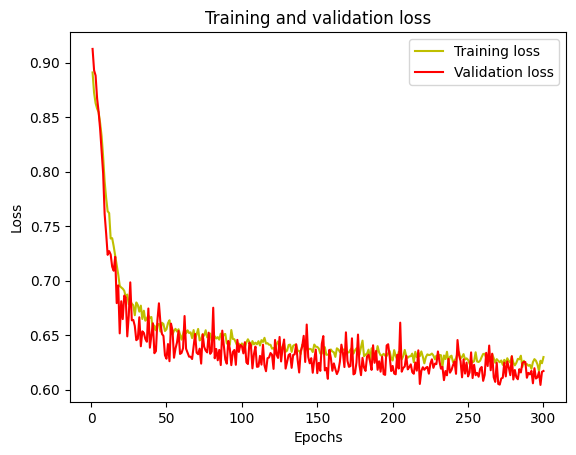

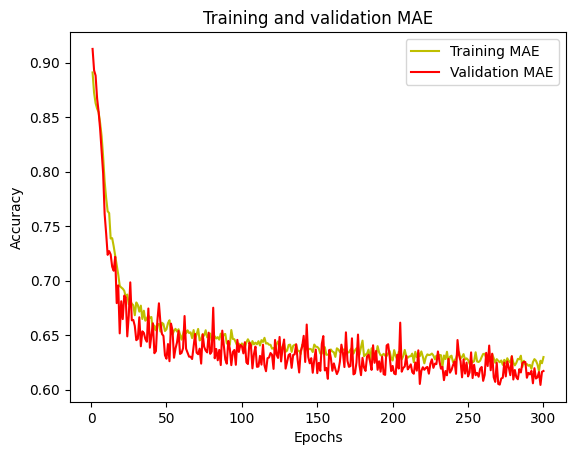

187/187 [==============================] - 0s 766us/step
Predicted values are:  [[28.79714 ]
 [50.46693 ]
 [30.204407]
 ...
 [29.032244]
 [57.86788 ]
 [24.768372]]
Real values are:  ts
2022-10-11 23:00:00+00:00    32.0
2023-02-28 22:00:00+00:00    59.0
2022-10-30 07:00:00+00:00    17.0
2022-10-01 19:00:00+00:00    34.0
2021-06-01 04:00:00+00:00    51.0
                             ... 
2021-04-12 03:00:00+00:00    36.0
2021-07-17 12:00:00+00:00    29.0
2021-04-15 22:00:00+00:00    28.0
2023-01-14 07:00:00+00:00    50.0
2021-07-17 02:00:00+00:00    14.0
Name: Biossido di Azoto, Length: 5983, dtype: float64


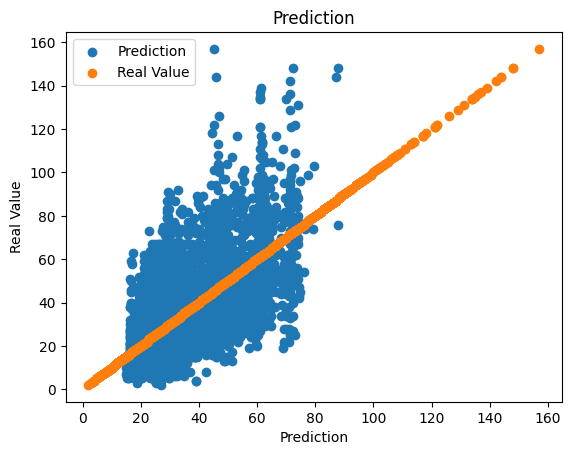

In [59]:
# plot the training and validation accuracy and loss at each epoch
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "y", label="Training loss")
plt.plot(epochs, val_loss, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


acc = history.history["mean_squared_error"]
val_acc = history.history["val_mean_squared_error"]
plt.plot(epochs, acc, "y", label="Training MAE")
plt.plot(epochs, val_acc, "r", label="Validation MAE")
plt.title("Training and validation MAE")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

############################################
# Predict on test data
predictions = model.predict(X_test_scaled)

predictions = scaler.inverse_transform(predictions)

y_test_ssaved = y_test_s
y_test_s = y_test
print("Predicted values are: ", predictions)
print("Real values are: ", y_test_s)

##############################################
# Plot and compare prediction and real value
t = np.arange(0, predictions.size, 1)
plt.scatter(predictions, y_test_s, label="Prediction")
plt.scatter(y_test_s, y_test_s, label="Real Value")
plt.title("Prediction")
plt.xlabel("Prediction")
plt.ylabel("Real Value")
plt.legend()
plt.show()

In [60]:
##Example of RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error

from sklearn.metrics import r2_score

In [61]:
##Same thing you have done before, define an X and y from a dataset if you want to try.

xtrain, xtest, ytrain, ytest = train_test_split(X, y, shuffle=True, test_size=0.20)
scaler = MinMaxScaler()
scaler2 = MinMaxScaler()
scaler.fit(xtrain)

X_train = scaler.transform(xtrain)
X_test = scaler.transform(xtest)
scaler2.fit(ytrain.values.reshape(-1, 1))

y_train = scaler2.transform(ytrain.values.reshape(-1, 1))
y_test = scaler2.transform(ytest.values.reshape(-1, 1))

In [62]:
rfr = RandomForestRegressor()


# Here are some hyperparameter of your regressor, it's a bit better and easier to look up at what the difference
# parameter does. All of this hyperparameter can be optimized using the validation data.
RandomForestRegressor(
    bootstrap=True,
    ccp_alpha=0.0,
    criterion="mse",
    max_depth=10,
    max_features=3,
    max_leaf_nodes=None,
    max_samples=0.1,
    min_impurity_decrease=0.0,
    min_samples_leaf=0.01,
    min_samples_split=2,
    min_weight_fraction_leaf=0.0,
    n_estimators=100,
    n_jobs=None,
    oob_score=False,
    random_state=None,
    verbose=0,
    warm_start=False,
)

RandomForestRegressor(criterion='mse', max_depth=10, max_features=3,
                      max_samples=0.1, min_samples_leaf=0.01)

c:\Users\lucag\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


R-squared: 0.9277268879140622
MSE:  0.0077020329930657504
RMSE:  0.0038510164965328752


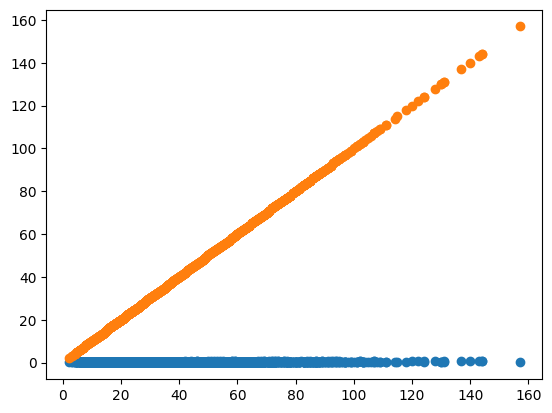

In [63]:
# fit of the RandomForestRegressor

rfr.fit(X_train, y_train.reshape(-1, 1))
# evaluation of its performance by the R-squared

score = rfr.score(X_train, y_train.reshape(-1, 1))
print("R-squared:", score)

ypred = rfr.predict(X_test)
# evaluation of its performance by the mean_squared_error

mse = mean_squared_error(y_test, ypred)
print("MSE: ", mse)
print("RMSE: ", mse * (1 / 2.0))

plt.scatter(ytest, ypred)
plt.scatter(ytest, ytest)